## Introduction

In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations etc. The recipient (i.e., the borrower) incurs a debt and is usually liable to pay interest on that debt until it is repaid as well as to repay the principal amount borrowed. 

## Data Id 📋

This dataset is named Loan Prediction Dataset data set. The dataset contains a set of 613 records under 13 attributes:



## The main objective for this dataset:

Using machine learning techniques to predict loan payments.

## target value:Loan_Status

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Prateek\Desktop\Machine_Learning Project\loan_data_set.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Categorical data remove nan value
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [10]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Numerical data removing nan
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outliers Detection & Handling

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


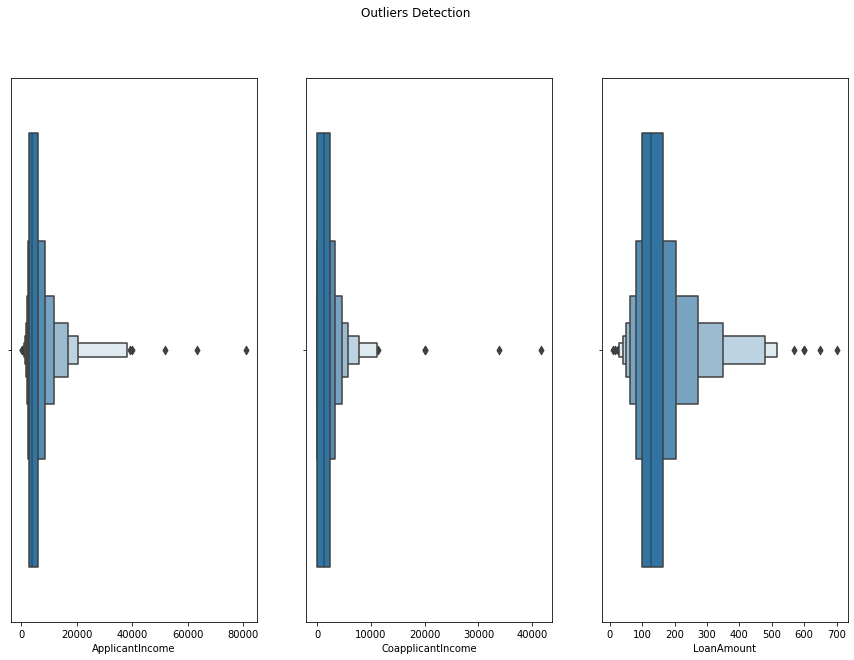

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(1, 3, 1)
sns.boxenplot(df['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxenplot(df['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxenplot(df['LoanAmount'])

plt.suptitle("Outliers Detection")
plt.show()

In [14]:
print("Before Removing the Outliers", df.shape)

df = df[df['ApplicantIncome']<25000]

print("After Removing the Outliers",df.shape)

Before Removing the Outliers (614, 13)
After Removing the Outliers (607, 13)


In [15]:
print("Before Removing the Outliers", df.shape)

df = df[df['CoapplicantIncome']<12000]

print("After Removing the Outliers",df.shape)

Before Removing the Outliers (607, 13)
After Removing the Outliers (603, 13)


In [16]:
print("Before Removing the Outliers", df.shape)

df = df[df['LoanAmount']<400]

print("After Removing the Outliers",df.shape)

Before Removing the Outliers (603, 13)
After Removing the Outliers (591, 13)


## Analysis

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

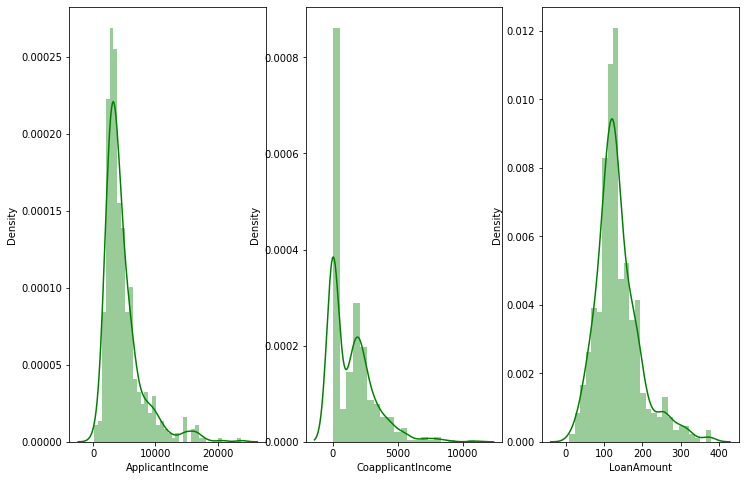

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(1, 3, 1)
sns.distplot(df['ApplicantIncome'],color='g')

plt.subplot(1, 3, 2)
sns.distplot(df['CoapplicantIncome'],color='g')

plt.subplot(1, 3, 3)
sns.distplot(df['LoanAmount'],color='g')

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

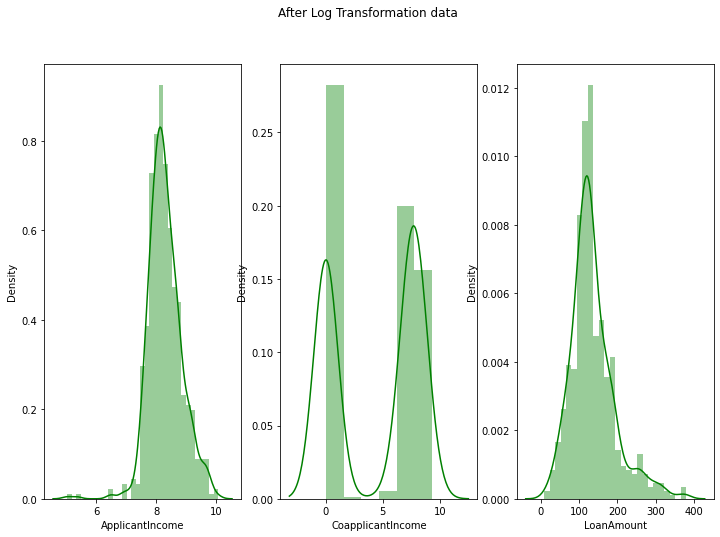

In [18]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

plt.figure(figsize=(12,8))
plt.subplot(1, 3, 1)
sns.distplot(df['ApplicantIncome'],color='g')

plt.subplot(1, 3, 2)
sns.distplot(df['CoapplicantIncome'],color='g')

plt.subplot(1, 3, 3)
sns.distplot(df['LoanAmount'],color='g')

plt.suptitle("After Log Transformation data")
plt.show()

In [19]:
num = df.select_dtypes('number').columns.tolist()
cat = df.select_dtypes('object').columns.tolist()


In [20]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [21]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

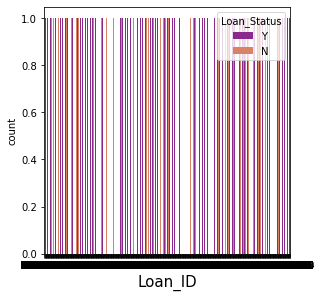

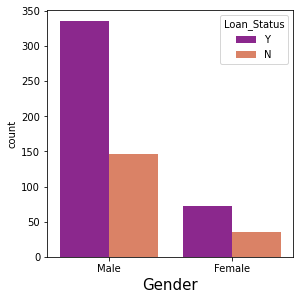

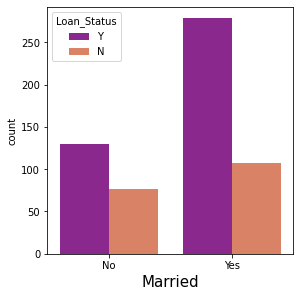

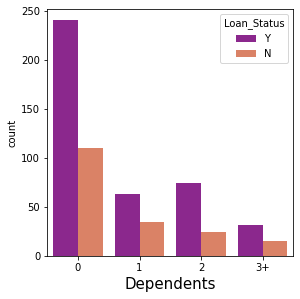

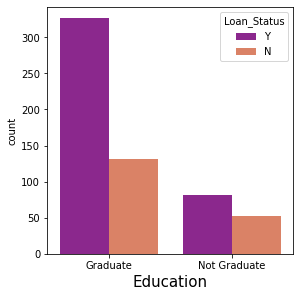

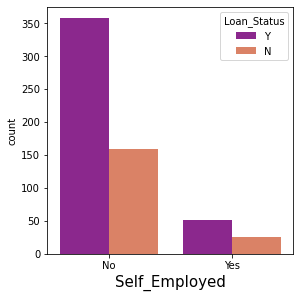

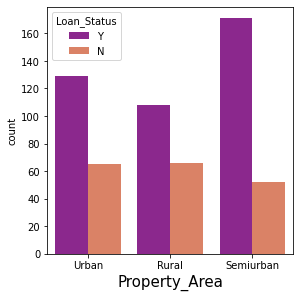

In [22]:
for i in cat[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i,hue='Loan_Status',data=df, palette='plasma')
    plt.xlabel(i, fontsize = 15)

## Plot Caregorical with Target Data

In [23]:
print(pd.crosstab(df['Loan_Status'], df['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [24]:
print(pd.crosstab(df['Loan_Status'], df['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [25]:
print(pd.crosstab(df['Loan_Status'], df['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [26]:
print(pd.crosstab(df['Loan_Status'], df['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


## Data Prepration

In [27]:
df.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [28]:
df=df.drop(['Loan_ID'],axis=1)

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [30]:
df.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [31]:
df['Gender'] = df['Gender'].replace(('Male','Female'),(1,0))
df['Married'] = df['Married'].replace(('Yes','No'),(1,0))
df['Education'] = df['Education'].replace(('Graduate','Not Graduate'),(1,0))

In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,1,1,1,1,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,1,1,0,1,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,1,1,0,0,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,1,0,0,1,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [33]:
df['Self_Employed'] = df['Self_Employed'].replace(('Yes','No'),(1,0))
df['Loan_Status'] = df['Loan_Status'].replace(('Y','N'),(1,0))
df['Property_Area'] = df['Property_Area'].replace(('Urban','Semiurban','Rural'),(1,1,0))

df['Dependents'] = df['Dependents'].replace(('0', '1', '2', '3+'),(0,1,1,1))


In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [35]:
y = df['Loan_Status']
x = df.drop(['Loan_Status'],axis=1)

In [36]:
x.shape

(591, 11)

In [37]:
y.shape

(591,)

## Handle Imbalance Data

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
x_rasmple, y_rasmple = SMOTE().fit_resample(x, y.values.ravel())

In [40]:
print(x_rasmple.shape)
print(y_rasmple.shape)

(816, 11)
(816,)


In [41]:
y.shape

(591,)

## Train test split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

In [44]:
xtrain.shape, xtest.shape

((413, 11), (178, 11))

In [45]:
ytest.shape, ytest.shape

((178,), (178,))

## Model Building

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)

C:\Users\Prateek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_pred = LR.predict(xtest)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1], dtype=int64)

In [50]:
print("Training Accuracy",LR.score(xtrain,ytrain))
print("Test Accuracy", LR.score(xtest,ytest))

Training Accuracy 0.8159806295399515
Test Accuracy 0.8146067415730337


In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.41      0.57        54
           1       0.79      0.99      0.88       124

    accuracy                           0.81       178
   macro avg       0.88      0.70      0.73       178
weighted avg       0.84      0.81      0.79       178



In [53]:
print("Our Model Accuracy is",accuracy_score(y_pred, ytest) )

Our Model Accuracy is 0.8146067415730337


In [54]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [55]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [56]:
model_pred = np.array([[1,1,1, 1, 1,3924, 1733, 148.0, 360, 1, 1 ]])
model_pred

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.924e+03,
        1.733e+03, 1.480e+02, 3.600e+02, 1.000e+00, 1.000e+00]])

In [57]:
prediction = LR.predict(model_pred)
print(prediction[0])

0


C:\Users\Prateek\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [58]:
import pickle